In [48]:
import numpy as np
import math
import pandas as pd

In [49]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


In [50]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [51]:
def logistic_regression(X,y,lr,num_iterations,lamda_reg):
  N,D=X.shape
  w=np.zeros(D)
  for _ in range(num_iterations):
    #h=wT.x
    #u=sigmoid(h)
    h=sigmoid(np.dot(X,w))
    #L(w)=L1(w) + lamda.wT.w
    gradient=(np.dot(X.T,(h-y)))*1/N+lamda_reg*w
    w=w-lr*gradient
  return w

In [52]:
def process(filepath):

    df=pd.read_csv(filepath)
   
    df=df.fillna(df.mean(numeric_only=True))
    df=df.drop(columns=['Ticket','Name','Cabin','Embarked'])
    df["Age"] = df["Age"].ffill()
    df["Fare"] = df["Fare"].ffill()
    df["Sex"] = (df["Sex"].str[0]=="m").replace("m", 1).astype(int)

    return df


In [53]:
traindata = process("C:\\Users\\Aastha_Ishan\\Desktop\\Machine Learning\\Assignment-1\\train (1).csv")
testdata = process("C:\\Users\\Aastha_Ishan\\Desktop\\Machine Learning\\Assignment-1\\test (1).csv")
test_ids = testdata["PassengerId"]

In [54]:
target = "Survived"
X = traindata.drop(columns="Survived")
y= traindata[target]
print("X shape: ", X.shape)
print("y shape: ", y.shape)
# Assuming X contains your features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X shape:  (891, 7)
y shape:  (891,)


In [55]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
acc_baseline = y.value_counts(normalize=True).max()
print("Baseline Accuracy", round(acc_baseline, 4))

Baseline Accuracy 0.6162


In [57]:
lr=0.01
num_iterations=50
lamda_reg=0.5

w=logistic_regression(X,y,lr,num_iterations,lamda_reg)

In [58]:
def accuracy(h,w):
  n=h.shape[0]
  acc=0
  for i in range(n):
    if((h[i]>=0.5 and y[i]==1) or (h[i]<0.5 and y[i]==0)):
      acc+=1
  print(f"Accuracy= {acc/n}\n")

In [59]:
#Create a colormap for visualization
colors=[(1,0,0),(1,1,1),(0,0,1)]
n_bins=100
cmap_name="custom_colormap"
cm=LinearSegmentedColormap.from_list(cmap_name,colors,N=n_bins)


In [60]:
# Assuming xx and yy are your meshgrid arrays
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
feature_matrix = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]

# Check the shape of the feature matrix
print(feature_matrix.shape)

# Ensure that your weight vector has the correct dimension (e.g., 3)
w = np.random.rand(3)

# Perform the dot product
Z = sigmoid(np.dot(feature_matrix, w))

# Rest of your code

(180400, 3)


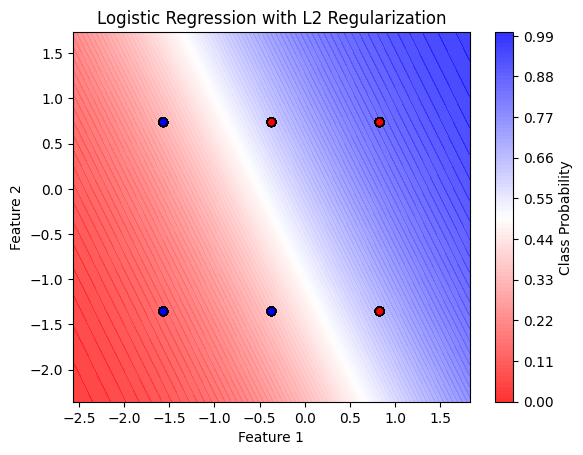

In [61]:

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = sigmoid(np.dot(np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()], w))
Z = Z.reshape(xx.shape)

# Create contour plot with custom colormap
contour = plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8, levels=np.linspace(0, 1, 101))

# Also plot the data points
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=cm, edgecolors='k', linewidths=1)

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label('Class Probability')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression with L2 Regularization')

plt.show()

In [62]:
def predict(X, weights):
    return sigmoid(np.dot(X, weights))

# Assuming you have X_train, y_train from your data
# Assuming you have already applied necessary preprocessing

# Train the model
lr = 0.01
num_iterations = 50
lamda_reg = 0.5

# Add a bias term to X_train
X_train_with_bias = np.c_[np.ones(X_train.shape[0]), X_train]

# Train the model
weights = logistic_regression(X_train_with_bias, y_train, lr, num_iterations, lamda_reg)

# Check if the size of the weight vector matches the number of features in X_train_with_bias
if weights.size != X_train_with_bias.shape[1]:
    print("Error: Size of the weight vector does not match the number of features.")
else:
    # Make predictions on the training set
    predictions_train = predict(X_train_with_bias, weights)

    # Round predictions to 0 or 1
    rounded_predictions_train = np.round(predictions_train)

    # Calculate accuracy manually
    accuracy_train = np.mean(rounded_predictions_train == y_train)
    print(f"Accuracy on Training Set: {accuracy_train:.2f}")

Accuracy on Training Set: 0.78


In [64]:
# Add a bias term to X_test
X_test_with_bias = np.c_[np.ones(testdata.shape[0]), testdata]

# Make predictions on the test set
predictions_test = predict(X_test_with_bias, weights)

# Round predictions to 0 or 1
rounded_predictions_test = np.round(predictions_test)

# Create a DataFrame with the predicted values
results_df = pd.DataFrame(data={'Predicted': rounded_predictions_test.astype(int)})

# Save the DataFrame to a CSV file
results_df.to_csv('Predictions.csv', index=False)

# Display the first few rows of the DataFrame
print(results_df.head())

   Predicted
0          1
1          1
2          1
3          1
4          1
